In [1]:
import os
import pandas as pd
import numpy as np
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from evolvepro.src.process import process_dataset, plot_mutations_per_position, plot_histogram_of_readout

In [2]:
project_root = ''
file_path = os.path.join(project_root, 'data' , 'dms', 'activity', 'Source.xlsx')
dataset_name = 'jones'
wt_fasta_path = os.path.join(project_root, 'data' , 'dms', 'wt_fasta', 'jones_WT.fasta')
activity_column = 'DMS_0.625'
cutoff_value = 2.8
output_dir = os.path.join(project_root, 'output' , 'dms')
sheet_name = 'ADRB2'
cutoff_rule = 'greater_than'
cutoff_percentiles = [90, 95]
AA_shift = None
drop_columns = True

In [3]:
# Process the dataset
brenan_df, brenan_frac = process_dataset(
    file_path=file_path,
    dataset_name=dataset_name,
    wt_fasta_path=wt_fasta_path,
    activity_column=activity_column,
    cutoff_value=cutoff_value,
    output_dir=output_dir,
    sheet_name=sheet_name,
    cutoff_rule=cutoff_rule,
    cutoff_percentiles=cutoff_percentiles,
    AA_shift=AA_shift,
    drop_columns=drop_columns
)

Cutoff values: [2.8, 2.8778037803, 3.2372829352999997]
Number above cutoff: [914, 780, 390]
Fractions above cutoff: [0.11717948717948717, 0.1, 0.05]


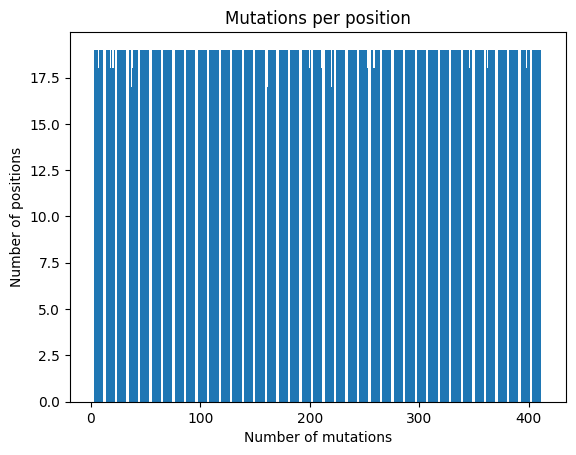

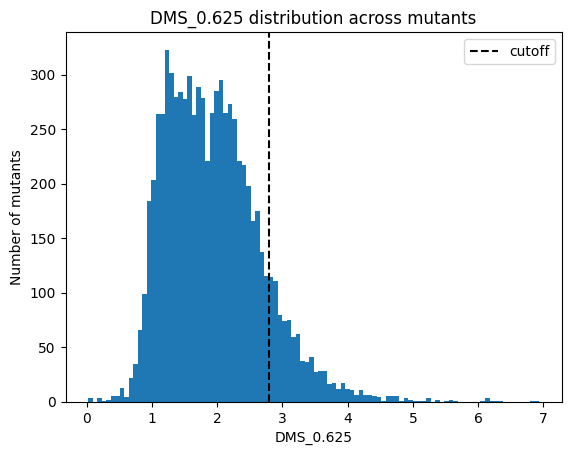

In [9]:
plot_mutations_per_position(brenan_df)
plot_histogram_of_readout(brenan_df, activity_column, cutoff_value)

In [10]:
# generating embeddings for all mutants
import sys
import evolvepro.plm.esm.extract as esm_extract

# simulating system command-line input for arguments
sys.argv = ['evolvepro/plm/esm/extract.py', 
            'esm1b_t33_650M_UR50S', # model name
            'output/dms/jones.fasta', # input sequence fasta file
            'output/dms/embeddings', # output location
            '--toks_per_batch', '512',
            '--include', 'mean',
            '--concatenate_dir', 'output'
            ]
esm_extract.main()

Read output/dms/jones.fasta with 7800 sequences
Processing 1 of 7800 batches (1 sequences)
Device: cpu
Processing 2 of 7800 batches (1 sequences)
Device: cpu
Processing 3 of 7800 batches (1 sequences)
Device: cpu
Processing 4 of 7800 batches (1 sequences)
Device: cpu
Processing 5 of 7800 batches (1 sequences)
Device: cpu
Processing 6 of 7800 batches (1 sequences)
Device: cpu
Processing 7 of 7800 batches (1 sequences)
Device: cpu
Processing 8 of 7800 batches (1 sequences)
Device: cpu
Processing 9 of 7800 batches (1 sequences)
Device: cpu
Processing 10 of 7800 batches (1 sequences)
Device: cpu
Processing 11 of 7800 batches (1 sequences)
Device: cpu


KeyboardInterrupt: 